In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

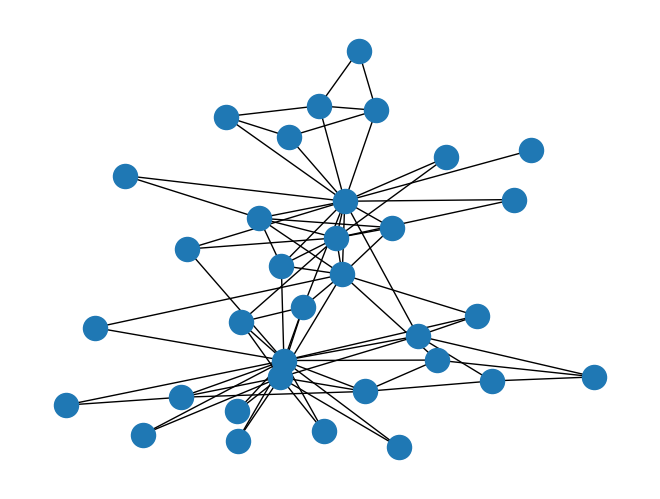

In [ ]:
G = nx.karate_club_graph()
nx.draw(G)

<ipython-input-43-7248a02683e7>:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edge_subset = random.sample(G.edges(), int(0.25 * G.number_of_edges()))


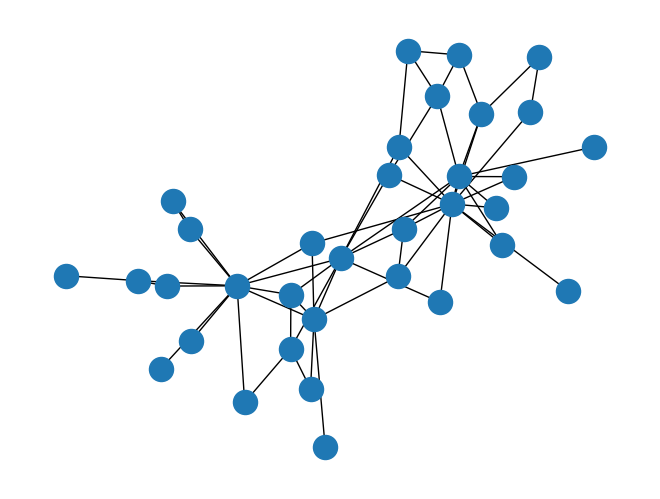

In [ ]:
# Take a random sample of edges
edge_subset = random.sample(G.edges(), int(0.25 * G.number_of_edges()))
# Remove some edges
G_karate_train = G.copy()
G_karate_train.remove_edges_from(edge_subset)
nx.draw(G_karate_train)

In [ ]:
prediction_jaccard = nx.jaccard_coefficient(G, edge_subset)
for u, v, p in prediction_jaccard:
    print(f"({u}, {v}) -> {p:.8f}")


(23, 27) -> 0.12500000
(5, 10) -> 0.16666667
(0, 31) -> 0.00000000
(31, 33) -> 0.09523810
(13, 33) -> 0.00000000
(0, 8) -> 0.05000000
(30, 32) -> 0.14285714
(18, 33) -> 0.05555556
(0, 21) -> 0.05882353
(29, 32) -> 0.14285714
(29, 33) -> 0.16666667
(1, 17) -> 0.10000000
(0, 3) -> 0.29411765
(6, 16) -> 0.20000000
(2, 13) -> 0.25000000
(1, 3) -> 0.36363636
(0, 13) -> 0.16666667
(4, 6) -> 0.16666667
(20, 32) -> 0.07692308


In [ ]:
prediction_adamic_adar = nx.adamic_adar_index(G, edge_subset)
for u, v, p in prediction_adamic_adar:
    print(f"({u}, {v}) -> {p:.8f}")

(23, 27) -> 0.35295612
(5, 10) -> 0.36067376
(0, 31) -> 0.00000000
(31, 33) -> 1.31266883
(13, 33) -> 0.00000000
(0, 8) -> 0.43429448
(30, 32) -> 0.97429106
(18, 33) -> 0.40242960
(0, 21) -> 0.45511961
(29, 32) -> 0.97429106
(29, 33) -> 2.46645958
(1, 17) -> 0.36067376
(0, 3) -> 3.67479159
(6, 16) -> 0.72134752
(2, 13) -> 1.37390400
(1, 3) -> 2.13765070
(0, 13) -> 1.44752472
(4, 6) -> 0.36067376
(20, 32) -> 0.35295612


In [ ]:
prediction_neighbour = nx.common_neighbor_centrality(G, edge_subset, alpha = 1.0)
for u, v, p in prediction_neighbour:
    print(f"({u}, {v}) -> {p:.8f}")

(23, 27) -> 1.00000000
(5, 10) -> 1.00000000
(0, 31) -> 0.00000000
(31, 33) -> 2.00000000
(13, 33) -> 0.00000000
(0, 8) -> 1.00000000
(30, 32) -> 2.00000000
(18, 33) -> 1.00000000
(0, 21) -> 1.00000000
(29, 32) -> 2.00000000
(29, 33) -> 3.00000000
(1, 17) -> 1.00000000
(0, 3) -> 5.00000000
(6, 16) -> 1.00000000
(2, 13) -> 3.00000000
(1, 3) -> 4.00000000
(0, 13) -> 3.00000000
(4, 6) -> 1.00000000
(20, 32) -> 1.00000000


In [ ]:
def compute_katz_index(G):
  G1 = G.copy()
  for u, v in G1.edges():
      G[u][v]['weight'] = 1
  A = nx.to_numpy_array(G1, dtype=int)
  beta = 0.4
  katz_matrix = np.linalg.inv(np.eye(len(A)) - (beta *  A)) - np.eye(len(A))  # katz matrix = [I - (beta * A)] ^ -1  - I
  return katz_matrix

In [ ]:
katz_matrix = compute_katz_index(G)
for u,v in edge_subset:
  print(f"({u}, {v}) -> {katz_matrix[u][v]:.8f}")

(23, 27) -> -0.22620393
(5, 10) -> 0.42164546
(0, 31) -> 0.00359002
(31, 33) -> 0.18896770
(13, 33) -> -1.62873661
(0, 8) -> 0.02841578
(30, 32) -> -0.39137013
(18, 33) -> -1.12311826
(0, 21) -> -0.04258651
(29, 32) -> -0.66407162
(29, 33) -> 1.72582229
(1, 17) -> 0.22368730
(0, 3) -> 0.03557832
(6, 16) -> -0.71513192
(2, 13) -> 1.64258293
(1, 3) -> -0.63237635
(0, 13) -> -0.02859941
(4, 6) -> 0.50551334
(20, 32) -> 0.44396014
